# Klasyfikator SVM wobec MNIST

**1. Przygotowanie danych**

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

**2. Skalowanie cech**

In [2]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

#pipe = Pipeline([
#    ('scaler', StandardScaler()),
#    ('svm_clf', svm_clf)
#])

scal = StandardScaler()
X_train_scalled = scal.fit_transform(X_train.astype(np.float32))
X_test_scalled = scal.fit_transform(X_test.astype(np.float32))

In [3]:
svm_clf = SVC(kernel='rbf') #od O(n^2*m) do O(n^3*m) więc ograniczam liczbę przykładów
svm_clf.fit(X_train_scalled[:10000], y_train[:10000])

SVC()

In [4]:
from sklearn.metrics import accuracy_score

y_pred = svm_clf.predict(X_train_scalled)
accuracy_score(y_train, y_pred) # ~ 94.5% dokładności na zbiorze treningowym

0.9455333333333333

**3. Dostrajanie modelu**

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,reciprocal

params = {"C": [2,3,5,10], "gamma": [0.002, 0.003, 0.005, 0.001] }
rnd_cv = RandomizedSearchCV(estimator=svm_clf, param_distributions=params, n_iter=10, cv=3, verbose=2)
rnd_cv.fit(X_train_scalled[:1500], y_train[:1500])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] gamma=0.005, C=10 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................ gamma=0.005, C=10, total=   2.1s
[CV] gamma=0.005, C=10 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ................................ gamma=0.005, C=10, total=   2.1s
[CV] gamma=0.005, C=10 ...............................................
[CV] ................................ gamma=0.005, C=10, total=   2.1s
[CV] gamma=0.002, C=5 ................................................
[CV] ................................. gamma=0.002, C=5, total=   1.7s
[CV] gamma=0.002, C=5 ................................................
[CV] ................................. gamma=0.002, C=5, total=   1.7s
[CV] gamma=0.002, C=5 ................................................
[CV] ................................. gamma=0.002, C=5, total=   1.7s
[CV] gamma=0.001, C=2 ................................................
[CV] ................................. gamma=0.001, C=2, total=   1.2s
[CV] gamma=0.001, C=2 ................................................
[CV] ................................. gamma=0.001, C=2, total=   1.2s
[CV] gamma=0.001, C=2 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   48.1s finished


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [2, 3, 5, 10],
                                        'gamma': [0.002, 0.003, 0.005, 0.001]},
                   verbose=2)

In [6]:
#najlepszy model
print(rnd_cv.best_estimator_)
print(rnd_cv.best_score_)

SVC(C=3, gamma=0.001)
0.8606666666666666


Mając najlepszy model można łatwo wykorzystać go do predykcji zarówno zbioru treningowego jak i testowego.

In [ ]:
rnd_cv.best_estimator_.fit(X_train_scalled, y_train) #lepiej nie załączać
#warto też sprawdzić model dla hiperparametrów C = 5, gamma = 0.005

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scalled)
accuracy_score(y_train, y_pred)

y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

# SVM wobec zbioru danych California housing

**1. Przygotowanie danych**

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVC
import numpy as np

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [42]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [43]:
from sklearn.svm import LinearSVR
import pandas as pd
import seaborn as sns


df = pd.DataFrame(X, columns = housing["feature_names"])
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00


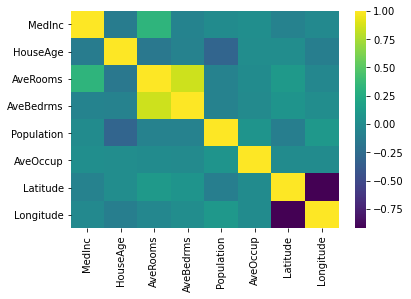

In [44]:
corr = df.corr().round(2)
sns.heatmap(corr, cmap = 'viridis')
corr

**2. Przeskalowanie i podzielenie na zbiory uczący i testowy**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [46]:
svr_clf = LinearSVR()

svr_clf.fit(X_train_scaled, y_train)

C:\Users\kicpe\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR()

**3. p r e d y k c j a**

In [48]:
from sklearn.metrics import mean_squared_error

y_pred = svr_clf.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

In [49]:
rmse #blad rzedu 1.1 * 10^4

1.106801529418468

To samo z wykorzystaniem jądra RBF

In [54]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,reciprocal

params = {"C": uniform(0.001, 0.1), "gamma": reciprocal(0.001, 0.1)}

rbf_clf_rns = RandomizedSearchCV(SVR(), param_distributions=params, cv=3, verbose=2, random_state=1)
rbf_clf_rns.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=0.042702200470257405, gamma=0.027583475549166736 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.042702200470257405, gamma=0.027583475549166736, total=   4.5s
[CV] C=0.042702200470257405, gamma=0.027583475549166736 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  C=0.042702200470257405, gamma=0.027583475549166736, total=   4.3s
[CV] C=0.042702200470257405, gamma=0.027583475549166736 ..............
[CV]  C=0.042702200470257405, gamma=0.027583475549166736, total=   4.4s
[CV] C=0.0010114374817344887, gamma=0.0040240664647146086 ............
[CV]  C=0.0010114374817344887, gamma=0.0040240664647146086, total=   5.0s
[CV] C=0.0010114374817344887, gamma=0.0040240664647146086 ............
[CV]  C=0.0010114374817344887, gamma=0.0040240664647146086, total=   5.0s
[CV] C=0.0010114374817344887, gamma=0.0040240664647146086 ............
[CV]  C=0.0010114374817344887, gamma=0.0040240664647146086, total=   5.1s
[CV] C=0.015675589081711305, gamma=0.001529949829431263 ..............
[CV]  C=0.015675589081711305, gamma=0.001529949829431263, total=   4.9s
[CV] C=0.015675589081711305, gamma=0.001529949829431263 ..............
[CV]  C=0.015675589081711305, gamma=0.001529949829431263, total=   4.9s
[CV] C=0.015675589081711305, gamma=0.001529949829431263 ........

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E809FC8C40>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E80A01F940>},
                   random_state=1, verbose=2)

In [55]:
rbf_clf_rns.best_estimator_

SVR(C=0.042702200470257405, gamma=0.027583475549166736)

In [57]:
rbf_clf_rns.best_estimator_.fit(X_train_scaled, y_train)

SVR(C=0.042702200470257405, gamma=0.027583475549166736)

In [61]:
y_pred = rbf_clf_rns.best_estimator_.predict(X_train_scaled)

mse = mean_squared_error(y_train, y_pred)
print(np.sqrt(mse)) 

0.7043553336619863


**RMSE** wobec zbioru testowego:

In [60]:
y_pred = rbf_clf_rns.best_estimator_.predict(X_test_scaled)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.6913147676853352
